[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/Code_09_3_Scikit_vs_SMF_vs_SM.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset
url = "https://richardson.byu.edu/220/birds.csv"
birds_data = pd.read_csv(url)

# Displaying the first few rows
print("First few rows of the dataset:")
print(birds_data.head())

# Summary of the dataset
print("\nDataset summary:")
print(birds_data.describe())

First few rows of the dataset:
  HabitatType  AnnualRainfall  AverageTemperature  ProtectedArea  \
0      Forest            1225                10.2  Not Protected   
1      Forest             937                 7.9      Protected   
2      Forest             705                16.8  Not Protected   
3      Forest            1158                12.0  Not Protected   
4     Wetland             785                11.4  Not Protected   

   BirdPopulation  
0             780  
1             960  
2             700  
3              20  
4            1170  

Dataset summary:
       AnnualRainfall  AverageTemperature  BirdPopulation
count      834.000000          834.000000      834.000000
mean      1028.806954           15.781415     6345.647482
std        273.419017            5.493596    18884.010739
min        334.000000           -1.000000       20.000000
25%        829.000000           12.000000      432.500000
50%       1030.000000           15.800000      855.000000
75%       1231.7

Take  a look at each data variable individually to see if there are any significant issues to pre-process.

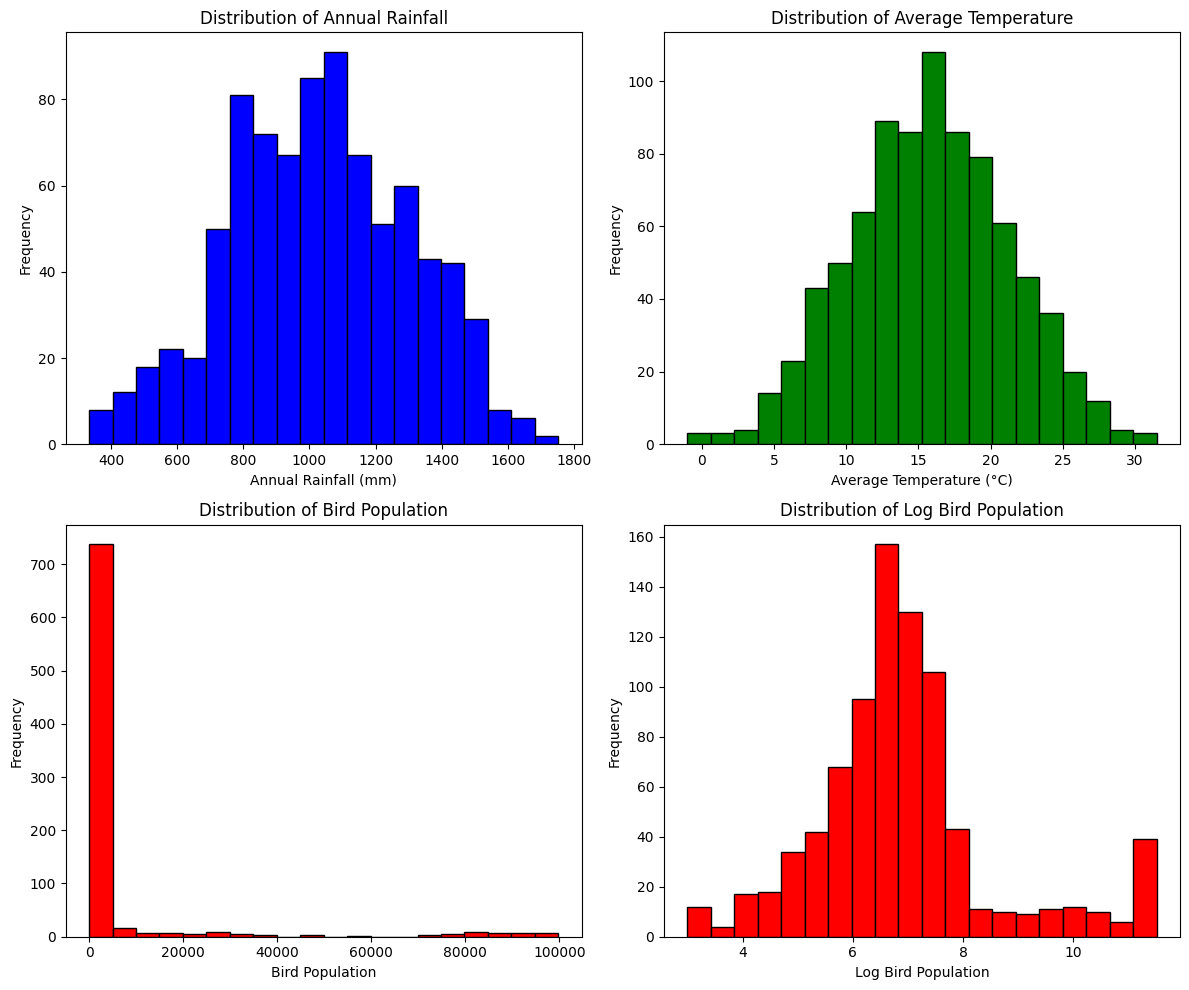

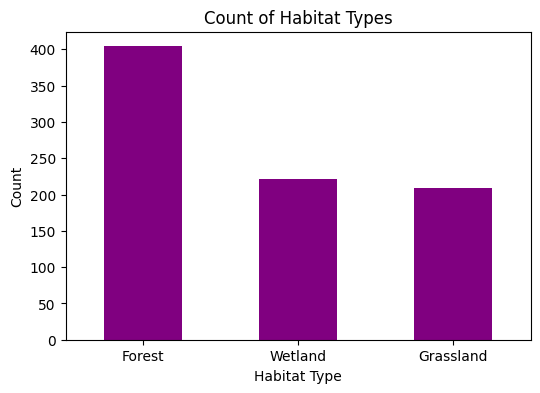

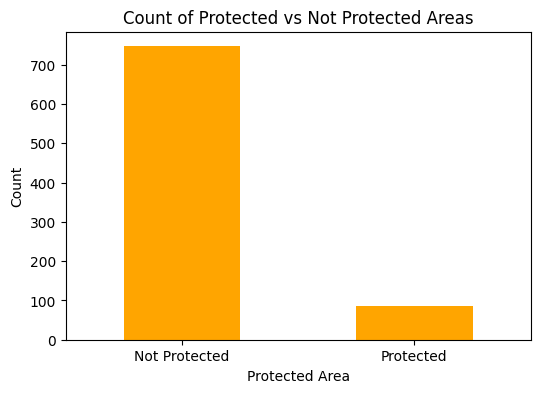

In [2]:

# Visualization of continuous variables
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histogram for AnnualRainfall
axs[0, 0].hist(birds_data['AnnualRainfall'], bins=20, color='blue', edgecolor='black')
axs[0, 0].set_title('Distribution of Annual Rainfall')
axs[0, 0].set_xlabel('Annual Rainfall (mm)')
axs[0, 0].set_ylabel('Frequency')

# Histogram for AverageTemperature
axs[0, 1].hist(birds_data['AverageTemperature'], bins=20, color='green', edgecolor='black')
axs[0, 1].set_title('Distribution of Average Temperature')
axs[0, 1].set_xlabel('Average Temperature (°C)')
axs[0, 1].set_ylabel('Frequency')



# Histogram for BirdPopulation
axs[1, 0].hist(birds_data['BirdPopulation'], bins=20, color='red', edgecolor='black')
axs[1, 0].set_title('Distribution of Bird Population')
axs[1, 0].set_xlabel('Bird Population')
axs[1, 0].set_ylabel('Frequency')


# Histogram for BirdPopulation
axs[1, 1].hist(np.log(birds_data['BirdPopulation']), bins=20, color='red', edgecolor='black')
axs[1, 1].set_title('Distribution of Log Bird Population')
axs[1, 1].set_xlabel('Log Bird Population')
axs[1, 1].set_ylabel('Frequency')

# Adjust layout for histograms
plt.tight_layout()

# Count plot for HabitatType
plt.figure(figsize=(6, 4))
birds_data['HabitatType'].value_counts().plot(kind='bar', color='purple')
plt.title('Count of Habitat Types')
plt.xlabel('Habitat Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Count plot for ProtectedArea
plt.figure(figsize=(6, 4))
birds_data['ProtectedArea'].value_counts().plot(kind='bar', color='orange')
plt.title('Count of Protected vs Not Protected Areas')
plt.xlabel('Protected Area')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Basic linear regression using sci-kit learn. We still need to get dummies and split the data. In any case we must do the following.

1. Get dummies
2. Split the data
3. Fit the model to the training data
4. Predict on the test set

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Convert categorical variables to dummy variables
birds_data_dummies = pd.get_dummies(birds_data, drop_first=True)

# Split the data into features and target
X = birds_data_dummies.drop('BirdPopulation', axis=1)
y = birds_data_dummies['BirdPopulation']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Coefficients and Intercept
print("\nModel Coefficients:")
print(pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient']))
print(f"\nIntercept: {model.intercept_}")


Mean Squared Error on Test Set: 256584697.52649322

Model Coefficients:
                         Coefficient
AnnualRainfall             32.340077
AverageTemperature      -1122.666462
HabitatType_Grassland    7160.489150
HabitatType_Wetland      1484.257051
ProtectedArea_Protected  1684.846613

Intercept: -11781.973585434409


What if we want to make transformations on the data.

1. Get dummies
2. Add or transform variables such as polynomial or log transformations
3. Split the data
4. Standardize the training data, apply transformation to the test data
5. Fit the model to the training data
6. Predict on the test set
7. If transformations were made on the target variable, back-transform

Sometimes, the ordering does not matter. For example, if you were to do a polynomial transformation and then standardize or standardize then do a polynomial transformation, both would work. Sometimes the order is important. You would not want to standardize and then take a log.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Convert categorical variables to dummy variables
birds_data_dummies = pd.get_dummies(birds_data, drop_first=True)

# Split the data into features and target
X = birds_data_dummies.drop('BirdPopulation', axis=1)
y = np.log(birds_data_dummies['BirdPopulation'])

# Add some higher order terms
X["RainfallSquared"] = X["AnnualRainfall"]**2
X["Temperature_Grassland"] = X["AverageTemperature"]*X["HabitatType_Grassland"]
X["Temperature_Wetland"] = X["AverageTemperature"]*X["HabitatType_Wetland"]


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns.to_list())
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns = X_train.columns.to_list())

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 1.3978882660736023


In [5]:
X_train_scaled

,AnnualRainfall,AverageTemperature,HabitatType_Grassland,HabitatType_Wetland,ProtectedArea_Protected,RainfallSquared,Temperature_Grassland,Temperature_Wetland
0,1.510640,-0.091646,-0.580236,-0.614898,-0.347863,1.660258,-0.557259,-0.565573
1,1.788588,0.631976,-0.580236,-0.614898,-0.347863,2.055042,-0.557259,-0.565573
2,0.044100,0.179712,1.723438,-0.614898,2.874698,-0.087302,1.375483,-0.565573
3,0.347648,0.089259,-0.580236,-0.614898,-0.347863,0.228124,-0.557259,-0.565573
4,-1.133520,-0.670544,-0.580236,-0.614898,-0.347863,-1.082302,-0.557259,-0.565573
...,...,...,...,...,...,...,...,...
662,1.514297,0.396799,1.723438,-0.614898,-0.347863,1.665321,1.515199,-0.565573
663,-0.153389,-0.706725,-0.580236,-0.614898,-0.347863,-0.279545,-0.557259,-0.565573
664,0.749941,0.143531,-0.580236,1.626287,-0.347863,0.683391,-0.557259,1.816764
665,-1.221293,-0.254461,-0.580236,1.626287,2.874698,-1.141901,-0.557259,1.497182


Suppose we want to use statsmodels formula. The main reason to do this would be to extract the p-values.

Reviewing the differences in the process for using the formula api:
1. You do not need to separate the target from the predictors, youo should keep it as one data frame
2. You don't need to create dummies, although you still might want to in order to remove specific factor levels.
3. Using the formula syntax, you don't need to remove variables from the data frame, you can just remove them from the formula

I'm going to show you a few shortcuts here as well.

In [6]:

import statsmodels.formula.api as smf

# Split the data into training and test sets
train_data, test_data = train_test_split(birds_data, test_size=0.2, random_state=42)

# Fit a linear regression model on the training set using statsmodels formula API
# The scale() function is used to standardize continuous variables
# You can also do in-place functions of the variables. We can do a log transformation of the target without
# changing the data frame
model_formula = 'np.log(BirdPopulation) ~ scale(AnnualRainfall) + scale(AverageTemperature) + HabitatType + ProtectedArea'
model = smf.ols(formula=model_formula, data=train_data).fit()

# Print the summary of the model
print(model.summary())

# Predicting on the test set
# Note: We use the same formula for prediction. The scale function will standardize the test data using mean and sd of the training data
y_pred = model.predict(test_data)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")



                              OLS Regression Results                              
Dep. Variable:     np.log(BirdPopulation)   R-squared:                       0.330
Model:                                OLS   Adj. R-squared:                  0.324
Method:                     Least Squares   F-statistic:                     64.98
Date:                    Fri, 10 Nov 2023   Prob (F-statistic):           3.55e-55
Time:                            18:37:50   Log-Likelihood:                -1148.3
No. Observations:                     667   AIC:                             2309.
Df Residuals:                         661   BIC:                             2336.
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

A few other neat things. You can add powers and interactions directly into the formula.

In [7]:
model_formula = 'np.log(BirdPopulation) ~ scale(AnnualRainfall) + np.power(scale(AnnualRainfall), 2) + scale(AverageTemperature) + C(HabitatType)*scale(AverageTemperature) + C(ProtectedArea)'
model = smf.ols(formula=model_formula, data=train_data).fit()

# Print the summary of the model
print(model.summary())

y_pred = model.predict(test_data)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

                              OLS Regression Results                              
Dep. Variable:     np.log(BirdPopulation)   R-squared:                       0.484
Model:                                OLS   Adj. R-squared:                  0.477
Method:                     Least Squares   F-statistic:                     77.05
Date:                    Fri, 10 Nov 2023   Prob (F-statistic):           2.44e-89
Time:                            18:39:04   Log-Likelihood:                -1061.1
No. Observations:                     667   AIC:                             2140.
Df Residuals:                         658   BIC:                             2181.
Df Model:                               8                                         
Covariance Type:                nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

Notice that Habitat Type Wetland is not significant. We can deal with this in a few ways. If we want to remove it, we need to create dummies for the variables again.

In [12]:
# Create dummy variables manually
birds_data_2 = pd.get_dummies(birds_data, columns=['HabitatType', 'ProtectedArea'], drop_first=True)

birds_data_2["Is Protected"] = birds_data_2["ProtectedArea_Protected"]

# Split the data
train_data, test_data = train_test_split(birds_data_2, test_size=0.2, random_state=42)

# Fit a linear regression model
# Note: Since we've manually created dummies, we don't need to use C() for these variables
model_formula = 'np.log(BirdPopulation) ~ scale(AnnualRainfall)  + scale(AverageTemperature) + HabitatType_Grassland + Q("Is Protected")'
model = smf.ols(formula=model_formula, data=train_data).fit()

# Print the summary
print(model.summary())

y_pred = model.predict(test_data)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")


                              OLS Regression Results                              
Dep. Variable:     np.log(BirdPopulation)   R-squared:                       0.330
Model:                                OLS   Adj. R-squared:                  0.325
Method:                     Least Squares   F-statistic:                     81.35
Date:                    Fri, 10 Nov 2023   Prob (F-statistic):           3.71e-56
Time:                            18:42:55   Log-Likelihood:                -1148.3
No. Observations:                     667   AIC:                             2307.
Df Residuals:                         662   BIC:                             2329.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Now using the statsmodel library without the formula is very useful when you are switching back and forth from scikit learn because it uses the same X and y resrouces. It is not as flexible as the formula is to do all the fun things the formula can, but often it is worth it. Especially when I have many variables, I prefer to ditch the formula because it gets long and winded.

BIG DEAL!!
There is one major difference between the X you need for the sm syntax. You must manually add the intercept using sm.add_constant

In [16]:

import statsmodels.api as sm

# Read the dataset
url = "https://richardson.byu.edu/220/birds.csv"
birds_data = pd.read_csv(url)

# Convert categorical variables to dummy variables
birds_data_dummies = pd.get_dummies(birds_data, drop_first=True)

# Split the data into features and target
X = birds_data_dummies.drop('BirdPopulation', axis=1)
y = np.log(birds_data_dummies['BirdPopulation'])

# Add some higher order terms
X["RainfallSquared"] = X["AnnualRainfall"]**2
X["Temperature_Grassland"] = X["AverageTemperature"]*X["HabitatType_Grassland"]
X["Temperature_Wetland"] = X["AverageTemperature"]*X["HabitatType_Wetland"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Add a constant term to the predictors
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Fit a linear regression model using statsmodels
model = sm.OLS(y_train.values.reshape(-1,1), X_train_scaled_sm)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Predict and evaluate the model
y_pred = results.predict(X_test_scaled_sm)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     77.05
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.44e-89
Time:                        18:45:57   Log-Likelihood:                -1061.1
No. Observations:                 667   AIC:                             2140.
Df Residuals:                     658   BIC:                             2181.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     